In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
star = pd.read_csv("star_classification.csv")
star.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
star.shape

(100000, 18)

In [4]:
star.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [5]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [6]:
from sklearn import preprocessing

In [7]:
labelEncoder = preprocessing.LabelEncoder()
star['class'] = labelEncoder.fit_transform(star['class'])

In [8]:
np.unique(star['class'])

array([0, 1, 2])

In [9]:
np.unique(star['rerun_ID'])

array([301])

In [10]:
np.unique(star['u'])

array([-9999.     ,    10.99623,    12.10168, ...,    29.32565,
          30.66039,    32.78139])

In [11]:
np.unique(star['g'])

array([-9999.     ,    10.4982 ,    10.51139, ...,    29.86258,
          30.607  ,    31.60224])

In [12]:
star = star.drop(['rerun_ID'],axis = 1)
star.shape

(100000, 17)

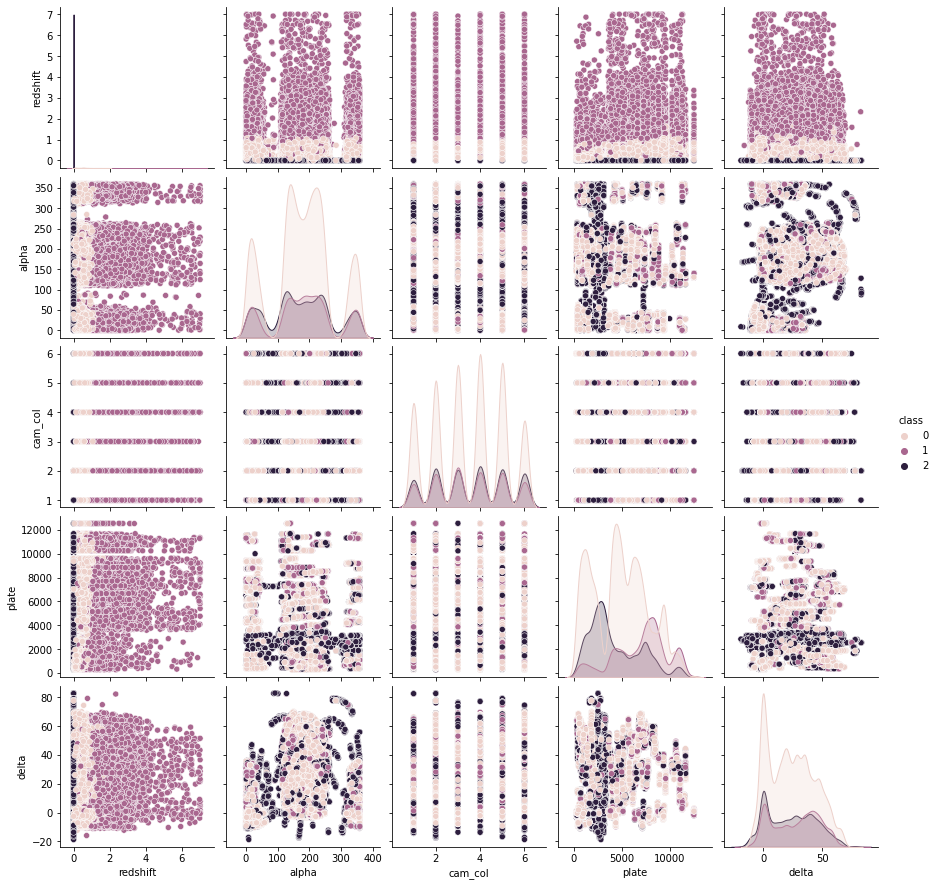

In [13]:
sns.pairplot(star, hue = "class", vars = ['redshift','alpha','cam_col','plate','delta'])

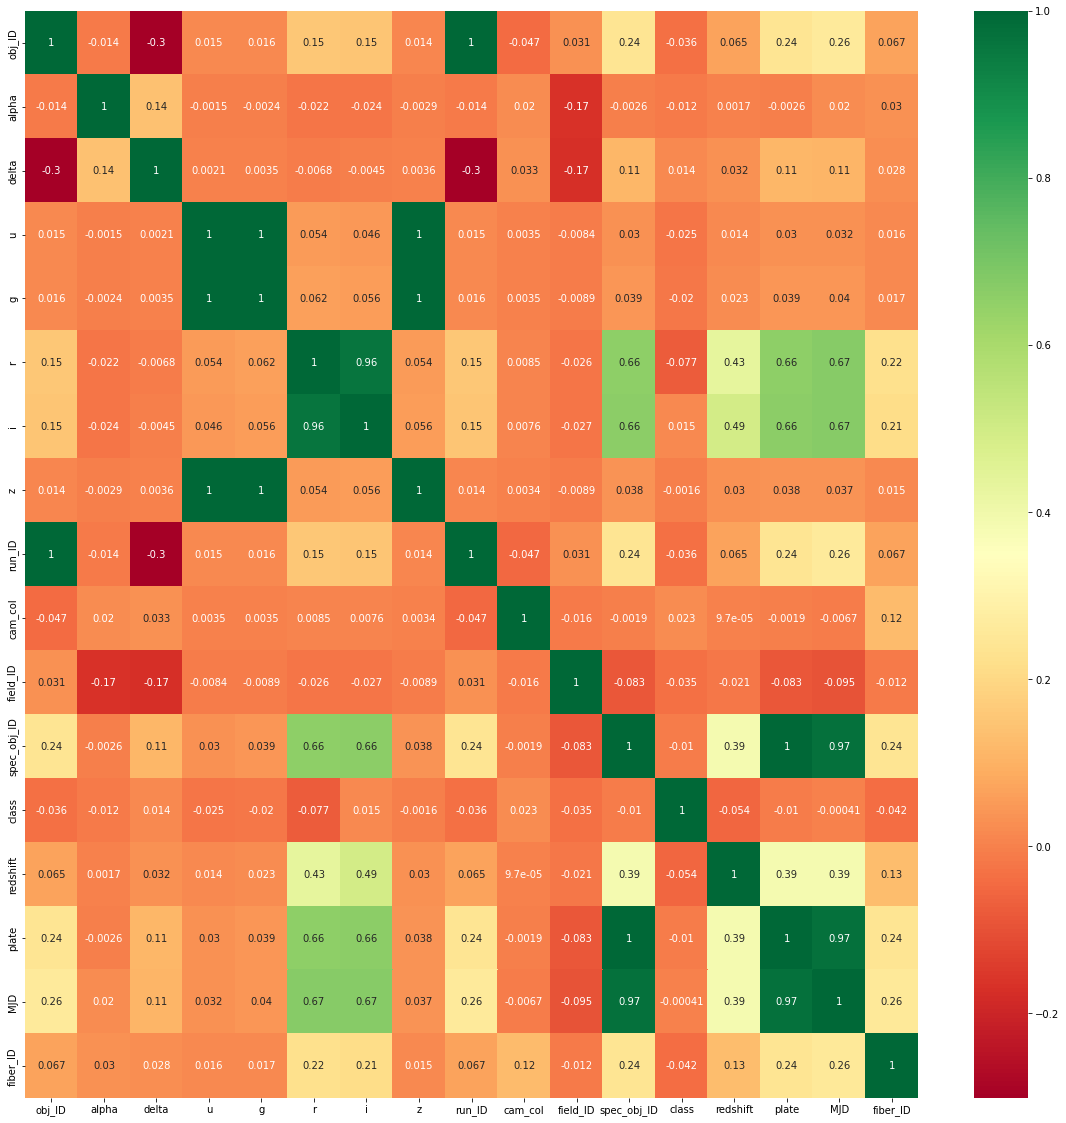

In [14]:
plt.figure(figsize = (20,20))
colour = plt.get_cmap("RdYlGn")
colour.set_bad("blue")
sns.heatmap(star.corr(), annot = True, cmap = colour)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


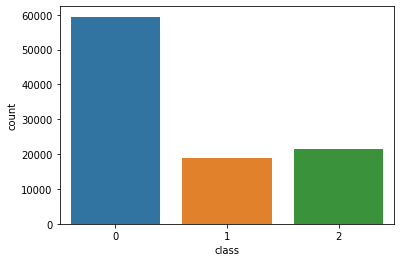

In [15]:
sns.countplot(star['class'])

In [16]:
star['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

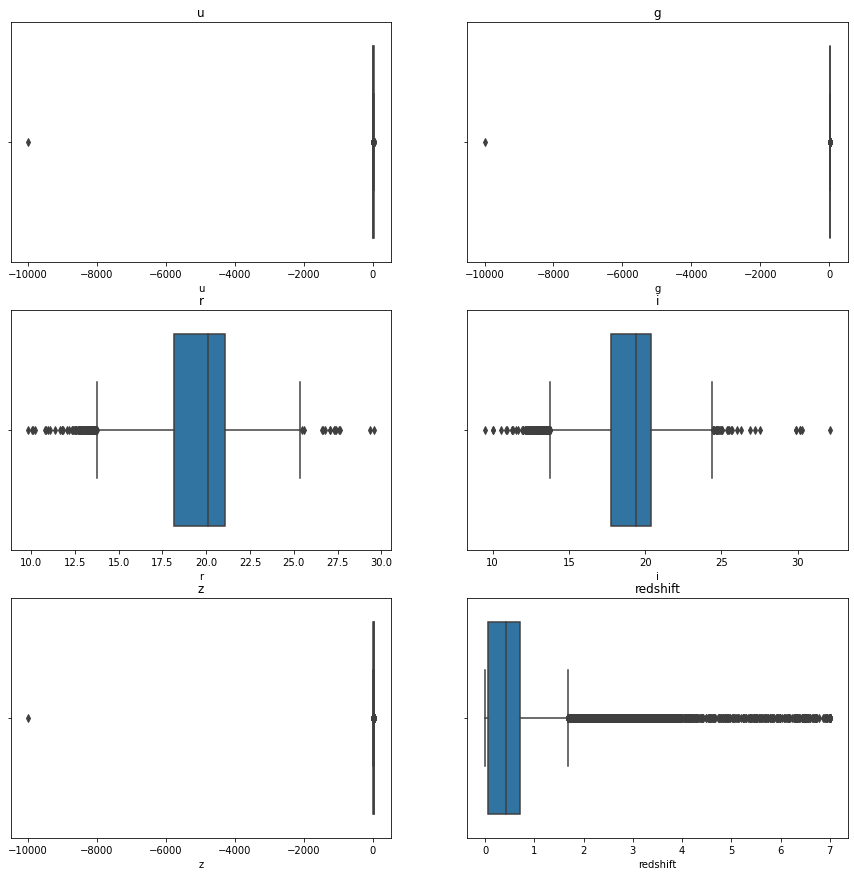

In [17]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
plt.title("u")
sns.boxplot(star['u'])

plt.subplot(3,2,2)
plt.title("g")
sns.boxplot(star['g'])

plt.subplot(3,2,3)
plt.title("r")
sns.boxplot(star['r'])

plt.subplot(3,2,4)
plt.title("i")
sns.boxplot(star['i'])

plt.subplot(3,2,5)
plt.title("z")
sns.boxplot(star['z'])

plt.subplot(3,2,6)
plt.title("redshift")
sns.boxplot(star['redshift'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

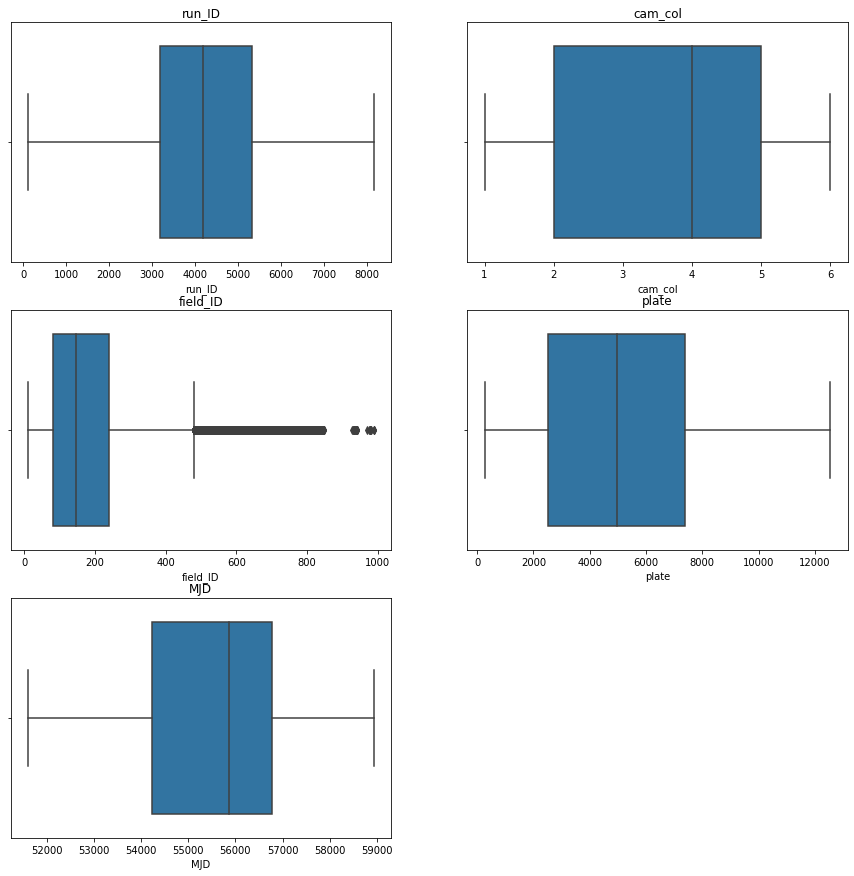

In [18]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
plt.title("run_ID")
sns.boxplot(star['run_ID'])

plt.subplot(3,2,2)
plt.title("cam_col")
sns.boxplot(star['cam_col'])

plt.subplot(3,2,3)
plt.title("field_ID")
sns.boxplot(star['field_ID'])

plt.subplot(3,2,4)
plt.title("plate")
sns.boxplot(star['plate'])

plt.subplot(3,2,5)
plt.title("MJD")
sns.boxplot(star['MJD'])

In [19]:
def removeOutliers(df,feature):
  Q3 = df[feature].quantile(0.75)
  Q1 = df[feature].quantile(0.25)
  IQR = Q3-Q1
  lowerLimit = Q1 - (1.5*IQR)
  upperLimit = Q3 + (1.5*IQR)

  lower = np.where(df[feature] <= lowerLimit)
  upper = np.where(df[feature] >= upperLimit)

  df.drop(lower[0], inplace = True)
  df.drop(upper[0], inplace = True)
  return df

In [20]:
starDf = removeOutliers(star,'redshift')

In [21]:
starDf.shape

(91010, 17)

In [22]:
starDf.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,91010.0,1.237665e+18,8.419472e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,91010.0,1.772282e+02,9.634265e+01,5.527828e-03,1.272132e+02,1.804077e+02,2.337087e+02,3.599998e+02
delta,91010.0,2.393757e+01,1.965767e+01,-1.878533e+01,4.897849e+00,2.329421e+01,3.954387e+01,8.300052e+01
u,91010.0,2.199671e+01,3.329828e+01,-9.999000e+03,2.026375e+01,2.227533e+01,2.379305e+01,3.278139e+01
g,91010.0,2.048543e+01,3.327963e+01,-9.999000e+03,1.876470e+01,2.109361e+01,2.219279e+01,3.160224e+01
r,91010.0,1.953397e+01,1.883613e+00,9.822070e+00,1.789087e+01,1.998701e+01,2.096052e+01,2.957186e+01
i,91010.0,1.893503e+01,1.746678e+00,9.469903e+00,1.749575e+01,1.925537e+01,2.017628e+01,3.025009e+01
z,91010.0,1.849566e+01,3.325184e+01,-9.999000e+03,1.725256e+01,1.885673e+01,1.972382e+01,2.938374e+01
run_ID,91010.0,4.470916e+03,1.960320e+03,1.090000e+02,3.180000e+03,4.192000e+03,5.323000e+03,8.162000e+03
cam_col,91010.0,3.509636e+00,1.587068e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00


In [23]:
starDf['class'].value_counts()

0    59411
2    21594
1    10005
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


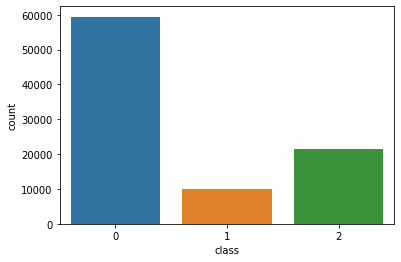

In [24]:
sns.countplot(starDf['class'])

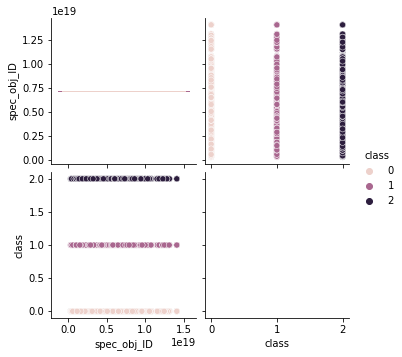

In [25]:
sns.pairplot(star, hue='class', vars=['spec_obj_ID', 'class'])

In [26]:
star = star.drop(['spec_obj_ID'], axis = 1)

In [27]:
star.shape

(91010, 16)

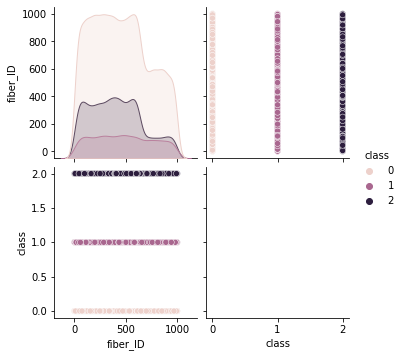

In [28]:
sns.pairplot(star, hue='class', vars=['fiber_ID', 'class'])

In [29]:
star = star.drop(["fiber_ID"], axis = 1)
star.shape

(91010, 15)

In [30]:
star = star.drop(['obj_ID'], axis = 1)
star.shape

(91010, 14)

In [31]:
np.unique(star['run_ID'])

array([ 109,  211,  273,  287,  297,  307,  308,  745,  752,  756,  994,
       1000, 1035, 1037, 1043, 1045, 1140, 1231, 1239, 1241, 1302, 1331,
       1336, 1339, 1345, 1350, 1356, 1402, 1404, 1411, 1412, 1450, 1453,
       1458, 1462, 1473, 1478, 1729, 1737, 1738, 1739, 1740, 1749, 1754,
       1755, 1854, 1855, 1862, 1869, 1889, 1896, 1897, 1904, 1907, 1992,
       2065, 2074, 2076, 2078, 2125, 2126, 2127, 2137, 2187, 2188, 2190,
       2194, 2206, 2207, 2243, 2247, 2248, 2259, 2299, 2304, 2305, 2326,
       2328, 2333, 2334, 2335, 2346, 2348, 2379, 2391, 2392, 2507, 2566,
       2574, 2583, 2659, 2662, 2677, 2700, 2711, 2728, 2777, 2820, 2821,
       2822, 2825, 2826, 2830, 2831, 2863, 2864, 2882, 2883, 2888, 2960,
       2961, 2963, 2964, 2968, 2986, 2987, 2989, 3015, 3031, 3058, 3059,
       3103, 3177, 3180, 3184, 3185, 3187, 3225, 3226, 3230, 3356, 3358,
       3366, 3367, 3434, 3438, 3461, 3462, 3478, 3512, 3525, 3530, 3557,
       3559, 3560, 3562, 3600, 3605, 3606, 3610, 36

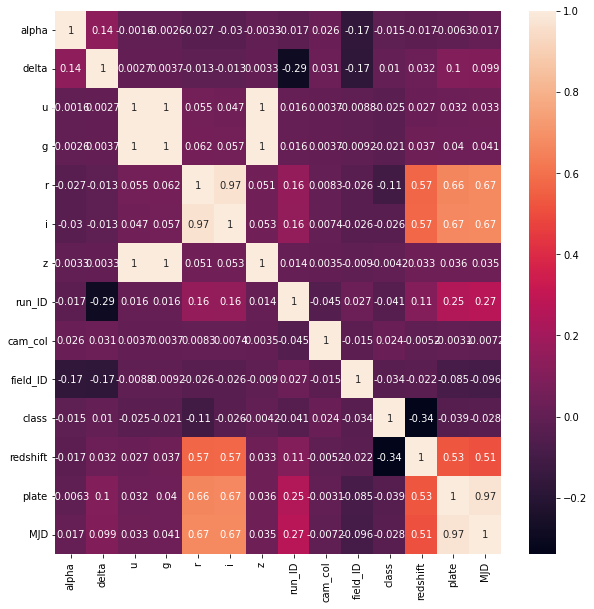

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(star.corr(), annot= True)
plt.show()

In [33]:
X = star.drop(['class'], axis = 1)
Y = star['class']

#DTree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7)
X_train.shape, X_test.shape

((63706, 13), (27304, 13))

In [36]:
scaler = preprocessing.MinMaxScaler()
X_trainScaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_testScaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [37]:
X_trainScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,63706.0,0.491920,0.267088,0.0,0.353378,0.500449,0.648179,1.0
delta,63706.0,0.420139,0.193117,0.0,0.233768,0.414292,0.573569,1.0
u,63706.0,0.483607,0.112122,0.0,0.394295,0.491715,0.565371,1.0
g,63706.0,0.478280,0.100036,0.0,0.391312,0.502213,0.554108,1.0
r,63706.0,0.491670,0.095599,0.0,0.407898,0.514735,0.564274,1.0
i,63706.0,0.455467,0.084280,0.0,0.385664,0.470891,0.515463,1.0
z,63706.0,0.482865,0.093729,0.0,0.409514,0.496445,0.543051,1.0
run_ID,63706.0,0.541529,0.243376,0.0,0.381349,0.507016,0.647461,1.0
cam_col,63706.0,0.501114,0.316831,0.0,0.200000,0.600000,0.800000,1.0
field_ID,63706.0,0.179684,0.153845,0.0,0.072597,0.139059,0.236196,1.0


In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
accuracy_score(y_test, y_pred)

0.9621300908291825

In [41]:
confusion_matrix(y_test, y_pred)

array([[17265,   537,    18],
       [  440,  2496,     0],
       [   37,     2,  6509]])

In [42]:
print("training accuracy score : {0}" .format(dtree.score(X_train, y_train)))
print("testing accuracy sccore : {0}".format(dtree.score(X_test, y_test)))

training accuracy score : 1.0
testing accuracy sccore : 0.9621300908291825


#Naive Bayes Theorem

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
y_pred = naiveBayes.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.6928288895399941

In [46]:
confusion_matrix(y_test, y_pred)

array([[11433,  2028,  4359],
       [  582,  2321,    33],
       [ 1234,   151,  5163]])

In [47]:
print("training accuracy score : {0}" .format(naiveBayes.score(X_train, y_train)))
print("testing accuracy sccore : {0}".format(naiveBayes.score(X_test, y_test)))

training accuracy score : 0.6843782375286472
testing accuracy sccore : 0.6928288895399941
